# Color and Region Combined

In [1]:
%matplotlib inline
# kartezyen düzlemde noktalama yapmak için kütüphanemiz
import matplotlib.pyplot as plt
# muhtemelen resim dosyalarını işlemek için kullandığımız 
# kütüphane
import matplotlib.image as mpimg
# NumPy'ın çok önemli bir kütüphane olduğunu biliyorum:
# ileri düzey matematik işlemler yapmak için kullanılıyor
import numpy as np

In [2]:
# Read in the image
# resim dosyasını oku
image = mpimg.imread('test.jpg')

In [3]:
# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see 
# our selection overlaid on the original.
# Görüntünün iki kopyasını oluştur. Birinde, yalnızca seçtiğimiz 
# değerlerle uyuşan pikselleri çıkaracağız, sonra onları kırmızıya 
# boyayım asıl resmin üstüne ekleyeceğiz.
ysize = image.shape[0] 
xsize = image.shape[1]
# print(xsize, ysize)
color_select= np.copy(image)
line_image = np.copy(image)


960 540


In [4]:
# Define our color criteria
# renk kriterlerini(eşik değerleri) belirle
red_threshold = 0
green_threshold = 255
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [5]:
# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image 
# processing you'll find these are not sensible values!!
# Üçgen bir ilgi alanı belirle. Unutma! resim dosyalarının ölçüleri 
# sol yukardan 0(sıfır) değeriyle başlar(x=0, y=0)
# Not: Ne kadar mantıklı bilmiyorum ama ben burada xsize ve ysize 
# (yani girdi resminin boyutları) değerlerini kullandım. bu değerler 
# zaten bana dikey ve yatay eksendeki değerleri veriyor.
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize/2]  # üçgenin tepe noktasına ne değer vermeli?
# Yahut üçgen değil de dörtgen mi kullansam daha iyi olur.
# neyse, önce üçgeni halledelim...

In [6]:
# fit lines (y=Ax+B) to identify 3 sided region of interest
# 3 kenarli bir ilgi alani oluşturmak için köşelerin arasında 
# kenarları yerleştir (y=Ax+B)
# np.polyfit() returns the coefficients [A, B] of the fit
# np.polyfit(), [A, B] katsayılarını veriyor
# A: slope of the line. -> çizginin eğimi
# B: vertical value. -> dikey eksenin değeri
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [7]:
# Mask pixels below the threshold
# Eşik değerinin altında kalan pikselleri maskele. 
# (bkz. Paint it Black - the Rolling Stones)
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [8]:
# Find the region inside the lines
# Önce bir ağ ızgara(meshgrid) oluşturuyoruz
# Noktaları birleştirerek oluşturduğumuz üçgenin iç alanını bul/belirle
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [9]:
# Mask color selection
color_select[color_thresholds | ~region_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

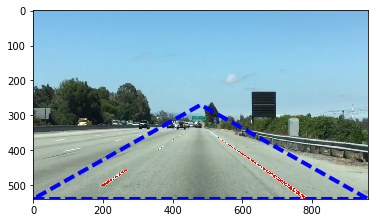

In [10]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)